# Day 15 Pre-Class Assignment: Fitting functions to data (curve-fitting) and thinking more about models

### <p style="text-align: right;"> &#9989; Put your name here</p>

<br/>
<img src="https://www.mathworks.com/help/examples/matlab/win64/CurveFittingViaOptimizationExample_01.png" alt="Curve-fitting" width=500px/>


## Goals for today's pre-class assignment

* Be able to articulate what regression is and why we use it
* Complete an Ordinary Least Squares function and use it to fit a linear model 
* Use SciPy to fit a specific function to data
* Describe the nature of building and using models to understand the world


## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

---
## Part 1: What is Regression?

In many applications, data depends on other data.  This is expressed with dependent variables that depend on independent variables.  For example, we know that sunlight ($s$, dependent variable) depends on the time of day ($t$, independent variable) and this can be expressed with saying $s$ is some function, $f$, of $t$ with $s = f(t)$.  If brigtness is linearly related to the time of day, we can fit a line through the relationship of these variables. 

One of the problems that arises in data science is that the data is invariably imperfect. We often say that the data has "noise" or "fluctuations". The problem is that we know that some of these fluctuations are not real: they are caused by errors in our measurements or any other factor that is not in our control. We do not want to take those fluctuations literally. In other cases the fluctuations might actually be real, but we don't want to focus our attention on those details because we simply want the trend. Regression solves this problem by providing a methodology to find a smoother function that is consistent with your data but doesn't attempt to match every detail, which may or may not be a real signal. 

A common form of regression is called **simple linear regression**. Simple linear regression finds the best line that goes through noisy data. But, there are other forms of regression that we will be interested in. Here are some of the methods we will explore in this class:

* Simple linear regression: fitting a best-fit line through a data set 
* Curve fitting: we might want to fit to some other curve, which you need to supply based on some insight into the data, of arbitrary form; for example, the exponential $ae^{-t}+ b$

----
## Part 2: Doing Regression "By Hand"

Time to practice using regression to fit a function to some data. The following video covers an example of fitting a simple linear regression model "by hand" - calculating the slope and intercept values given some data. 


#### Watch this video
If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/RegressionA+Methods+and+Examples/1_gtg70ib1).

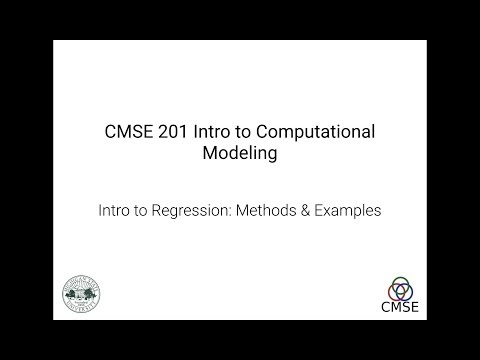

In [1]:
from IPython.display import YouTubeVideo  
YouTubeVideo("1YUHyBTztOc",width=640,height=360)

____
Using what was covered in the previous video, follow along with the code below where we will use ordinary least squares (OLS) solutions to fitting a simple linear regression model. 

First we can make our necessary imports and then generate some data to work with!

In [ ]:
# Import our necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# here is some x and y data of cricket chirps vs. temperature
chirps = np.array([20,16,19.8,18.4,17.1,15.5,14.7,17.1,15.4,16.2,15,17.2,16,17,14.4])
temperature = np.array([88.6,71.6,93.3,84.3,80.6,75.2,69.7,82,69.4,83.3,79.6,82.6,80.6,83.5,76.3])
#plot our data
plt.scatter(chirps, temperature, label = "data")
plt.xlabel("chirps")
plt.ylabel("temperature")
plt.legend()
plt.show()

Look at the plot above. Notice that the relationship between $y$ and $x$ is roughly linear. This means we can use the ordinary least squares (OLS) approach to fit a line to the data. Below is a function that performs OLS.

The equations for linear regression are at in the video, but are repeated here as a reference:

$$\bar{x} = \frac{1}{N}\sum_i x_i$$

$$\bar{y} = \frac{1}{N}\sum_i y_i$$

$$ m = \frac{\sum_i x_i y_i - N\bar{x}\bar{y}}{\sum_i x_i^2 - N\bar{x}^2}$$

$$ b = \bar{y} - m\bar{x}$$

Recall that:
* $x_i$ are the $x$ coordinates, and there are $N$ of them
* $y_i$ are the $y$ values of the data, and there are also $N$ of them
* the sums, $\sum_i$, means that you sum up all of the values that follow; for example, $\sum_ix_i = x_0 + x_1 + \cdots x_{N-1}$

Also note that $\bar{x}$ and $\bar{y}$ represent the mean of $x$ and the mean of $y$, respectively. 

#### &#9989;&nbsp; **2.1** In the function below, comment the code where specified and fill in the equation for calculating $b$, the intercept!

In [ ]:
# This function is used to calculate ordinary least squares regression parameters given some data

def my_ols_parameters(x, y):
    
    # average of x data
    mean_x = np.mean(x)
    
    # average of y data
    mean_y = np.mean(y)
    
    # number of data points we have -- len(y) would work too
    N = len(x)
    
    # the sum of all the x multiplied by all the y
    xy_product_sum = np.sum(x*y)
    
    # the sum of all the x squared
    xx_product_sum = np.sum(x**2)
    
    
    # what is this line doing?
    # comment here
    m = (xy_product_sum - N * mean_x * mean_y)/(xx_product_sum - N*mean_x**2)

    # UNCOMMENT AND FILL IN THIS CODE
    # calculate the intercept using the equation above
    #b = ?
    
    # what does this function return?
    # comment here
    return m, b

The function provided below (no changes to this function are needed) takes in our $x$ data and our estimated slope and intercept values to predict expected $y$ values. We will use this function below when we plot our fitted linear regression model!

In [ ]:
# THIS FUNCTION IS PROVIDED, NO CHANGES NECESSARY
# This function uses a regression equation to predict y given x
# It takes in b (the intercept), m (the coefficient), and
# x (the independent data)

def my_ols_regression(x, m, b):
    
    expected_y = m*x + b
    
    return expected_y

In the cell below, we call our finished `my_ols_parameters` function to calculate our parameters and then feed these into our `my_ols_regression` function to calculate our expected $y$ values.

#### &#9989;&nbsp; **2.2** Comment the code below where specified!

In [ ]:
# comment here - what is m & b?
m_expected, b_expected = my_ols_parameters(chirps, temperature)

# comment here - what are these values?
expected_y = my_ols_regression(chirps, m_expected, b_expected)

# plot our data against our fitted linear regression
plt.scatter(chirps, temperature, label = "data")
plt.plot(chirps, expected_y, color = "orange", label = "fit")

plt.legend()
plt.xlabel('chirps')
plt.ylabel('temperature')
plt.show()

#### &#9989;&nbsp; **2.3** Print out your calculated slope and intercept below. What do these values mean in terms of $x$ and $y$? That is, what does the slope tell you about how $y$ changes when $x$ changes? What information does the intercept provide?

In [ ]:
# Put your code here


<font size=+3>&#9998;</font> *Put your answer here.*

----
## Part 3. Fitting a function using `curve_fit`

Although we used our OLS function in the previous problem to fit a simple straight line, the [SciPy](https://scipy.org/) library, which is a collection of useful Python tools much like NumpY, provides us with a tool that can be used to fit all manner of functions: [`curve_fit` (you can click this link to read the documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

As with many Python packages, we need to import `curve_fit` first! **Make sure you review this important command and see how it differs or is similar to other import commands that we've used in the course**.

In [ ]:
# import curve_fit function
from scipy.optimize import curve_fit

# import numpy and matplotlib as well while we're at it
import numpy as np
import matplotlib.pyplot as plt

#### SciPy's `curve_fit` function takes in three arguments: 
- **A function that we define in Python** 
- **$x$ data** 
- **$y$ data**

**It then returns an array of parameters that our newly-defined function uses.**

Let's take a look at the example in the cell below. Run the cell and see that our data follows a sinusoidal relationship.

In [ ]:
# generate some x data: sixty data points from 0 to 4π
x_sin = np.linspace(0,4*np.pi,60)

# generate some y data: 1.5 * sin(1.2x + 0.5)
# we add the np.random.normal(0.25,.25,60) at the end to add some randomness to the data
y_sin = 1.5 * np.sin(1.2 * x_sin) + np.random.normal(.25,.25,60)

# plot our data
plt.scatter(x_sin, y_sin, label = "data")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Because this is just simulated data, we know that our "signal" is a sinusoid that has the relationship $y = 1.5 * \sin(1.2x)$.

The generic form of a typical sine curve model is:
$$y = A * \sin(Bx + C)$$

This means our true parameter values for this specific example are:

* $A = 1.5$
* $B = 1.2$
* $C = 0$

However, we usually don't know the values of these parameters in advance - that's why we use regression & curve fitting!

The first step in using `curve_fit` is that we define the sine function that we want to try to fit to our data. Look at how we've turned the mathematical model into a Python function in the cell below.

In [ ]:
def my_sin_function(x, A, B, C):
    # Confirm that information returned by this function matches the mathematical formula from above!
    return A * np.sin(B * x + C)

Next we can run `curve_fit` in the cell below now that we have our function defined and the data we want to fit.

`curve_fit` returns two values: the first is an array of our parameter values (referred to `popt` in the SciPy documentation). In this example, the resulting array will be $[A, B, C]$.

#### &#9989;&nbsp; **3.1** Print out the expected parameter values that from `curve_fit` (these parameters are stored in the `popt` variable, which is the first variable returned by the `curve_fit` function, as indicated by the documentation)

Are they close to our true values for $A$, $B$, and $C$ from above? from above?

In [ ]:
# Use curve_fit by passing in the sin function, x data, and y data
best_fit_parameters, just_ignore_this_for_now = curve_fit(my_sin_function, x_sin, y_sin)

# Print the array of fitted parameter values


<font size=+3>&#9998;</font> *Put your answer here.*

We can now "unpack" our parameter values and use them in our sine function to get our expected $y$ values based on our model.

#### &#9989;&nbsp; **3.2** Carefully read this code and make sure you understand it. You'll be using the same procedure in the next section!

Once we have our fitted curve, we can plot it against the data below!

In [ ]:
# Unpack the parameter results into separate variables so that we can feed them to our sine function
a_fit = best_fit_parameters[0]  # get fitted A value
b_fit = best_fit_parameters[1]  # get fitted B value
c_fit = best_fit_parameters[2]  # get fitted C value

# use my_sin_function with new parameters to get fitted y values
y_sin_fit = my_sin_function(x_sin, a_fit, b_fit, c_fit)


# plot our actual data
plt.scatter(x_sin, y_sin, label = "data")

# plot our fitted curve
plt.plot(x_sin, y_sin_fit, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### &#9989;&nbsp; **3.3** Is the fitted sine function from `curve_fit` a "good fit" for our data?

<font size=+3>&#9998;</font> *Record your thoughts here*

---
## Part 4. Practice Using `curve_fit`

Let’s put our new curve fitting tools to the test. We’ve provided you with a dataset in the cell below which can be modeled with a mathematical function. Let’s walk through the steps involved in fitting the dataset.

#### &#9989;&nbsp; **4.1** First, make a plot showing $x$ vs. $y$ so we can get a sense of what the data looks like.

In [ ]:
x = np.array([0.0,0.45,0.9,1.34,1.79,2.24,2.69,3.14,3.59,4.03,4.48,4.93,5.38,5.83,6.28,6.72,7.17,7.62,8.07,8.52,8.97,9.41,9.86,10.31,10.76,11.21,11.66,12.1,12.55,13.0])
y = np.array([0.74,0.92,1.16,1.65,2.23,2.56,2.92,2.9,2.97,2.98,2.54,2.48,2.31,2.3,2.34,2.39,2.94,3.36,3.61,4.1,4.33,4.61,4.78,4.62,4.29,4.17,4.22,3.9,3.98,4.29])

In [ ]:
# Make a plot of x vs. y here


We happen to know that this data can be modeled using the following equation: 

\begin{equation}
y = G\cos(x) + Dx +  L_0
\end{equation}


#### &#9989;&nbsp; **4.2** Turn the above equation into a function that we can use to fit the data.

In [ ]:
# Write your function here


#### &#9989;&nbsp; **4.3** Use the fitting procedure laid out in the previous section to find the best fit parameters (i.e., values for $G$, $D$, and $L_0$).

In [ ]:
# Write your code for fitting your data here


#### &#9989;&nbsp; **4.4** What values did you get for your best fit parameters?

<font size=+3>&#9998;</font> *Write your best fit parameters here*

#### &#9989;&nbsp; **4.5** Use your best fit parameters, as well as your function from 4.2, to make a best-fit line. If you get stuck you should refer to the code from 3.2.

In [ ]:
# Write your code for finding a line of best fit here


#### &#9989;&nbsp; **4.6** Is your function a good fit for this dataset?

<font size=+3>&#9998;</font> *Record your thoughts here*

---
## Part 5. Reminding ourselves what it means to "model" data

In a previous pre-class assignment, we paused to spend some time thinking about what we mean when we talk about "scientific models" or "computational models" The idea of "modeling" something is a core component of this course (as the name suggests!).

If you want a refresher on what a model is and how we can use models to understand the world around us, re-watch the following video.

If the the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Introduction+to+Computational+Models/1_rcr6iiyk).

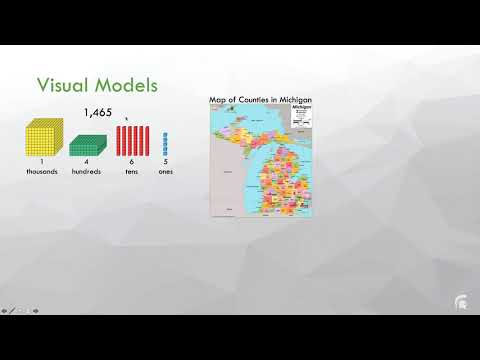

In [2]:
from IPython.display import YouTubeVideo  
YouTubeVideo("7qAunwHsuj8",width=640,height=360)

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2023,  [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.